In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("06-09 12-34-results-5.csv")
data['overfit%'] = 100*(data['train_accuracy'] - data['test_accuracy'])
data['overfit%'] = data['overfit%'].apply(lambda x: max(x, 0))

In [10]:
data.head()

,Unnamed: 0,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,l1_oc,filter_multiplier,kernel_size,stride,dropout_rate,weight_decay,overfit%
0,0,1,1,0.084321,0.97302,86.444910,88.153353,0.8853,4403518,0.0001,128,0.9,64,2,3,1,0.3,0.003,8.772
1,1,1,2,0.077090,0.97368,86.600018,182.272782,0.8868,4403518,0.0001,128,0.9,64,2,3,1,0.3,0.003,8.688
2,2,1,3,0.072473,0.97520,87.795805,277.612493,0.8914,4403518,0.0001,128,0.9,64,2,3,1,0.3,0.003,8.380
3,3,1,4,0.069754,0.97670,88.040870,373.659951,0.8864,4403518,0.0001,128,0.9,64,2,3,1,0.3,0.003,9.030
4,4,1,5,0.070300,0.97704,86.493299,467.751903,0.8932,4403518,0.0001,128,0.9,64,2,3,1,0.3,0.003,8.384


In [17]:
print('Time taken for execution (mins):', data[data.epoch == max(data.epoch)]['run duration'].sum()/60)

Time taken for execution (mins): 706.895119078954


### Best network configurations

In [44]:
cols_of_interest = [1, 2, 3, 4, 7, 8, 9, 17, 18]
data.iloc[data[data.test_accuracy == max(data.test_accuracy)].index, cols_of_interest]

,run,epoch,loss,train_accuracy,test_accuracy,total parameters,lr,weight_decay,overfit%
168,6,19,0.03989,0.98764,0.9018,4403518,0.001,0.003,8.584


### Effect of weight decay

In [33]:
wd_data = data.groupby(['weight_decay'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

(wd_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
weight_decay,,,,
0.003,0.0888374,0.971558,0.890017,8.15416
0.01,0.165467,0.948594,0.878417,7.01773
0.03,0.317388,0.905364,0.844788,6.08824
0.1,0.821426,0.725924,0.682989,4.36776
0.3,1.77847,0.393524,0.36612,2.83238


### Effect of lr on fine-tuning

In [120]:
lr_data = data.groupby(['lr'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

(lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
lr,,,,
0.0001,0.242075,0.964726,0.882961,8.17653
0.001,0.636586,0.781551,0.721667,6.00355
0.01,1.02429,0.620702,0.592771,2.89608


In [51]:
data.weight_decay.unique()

array([0.003, 0.01 , 0.03 , 0.1  , 0.3  ])

### Effect of weight decay and learning rate

In [129]:
wd_lr_data = data.groupby(['weight_decay', 'lr'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()
(wd_lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues').
background_gradient(subset='loss', cmap='YlGn'))

### Train vs Test accuracy for all weight decays and learning rate combinations

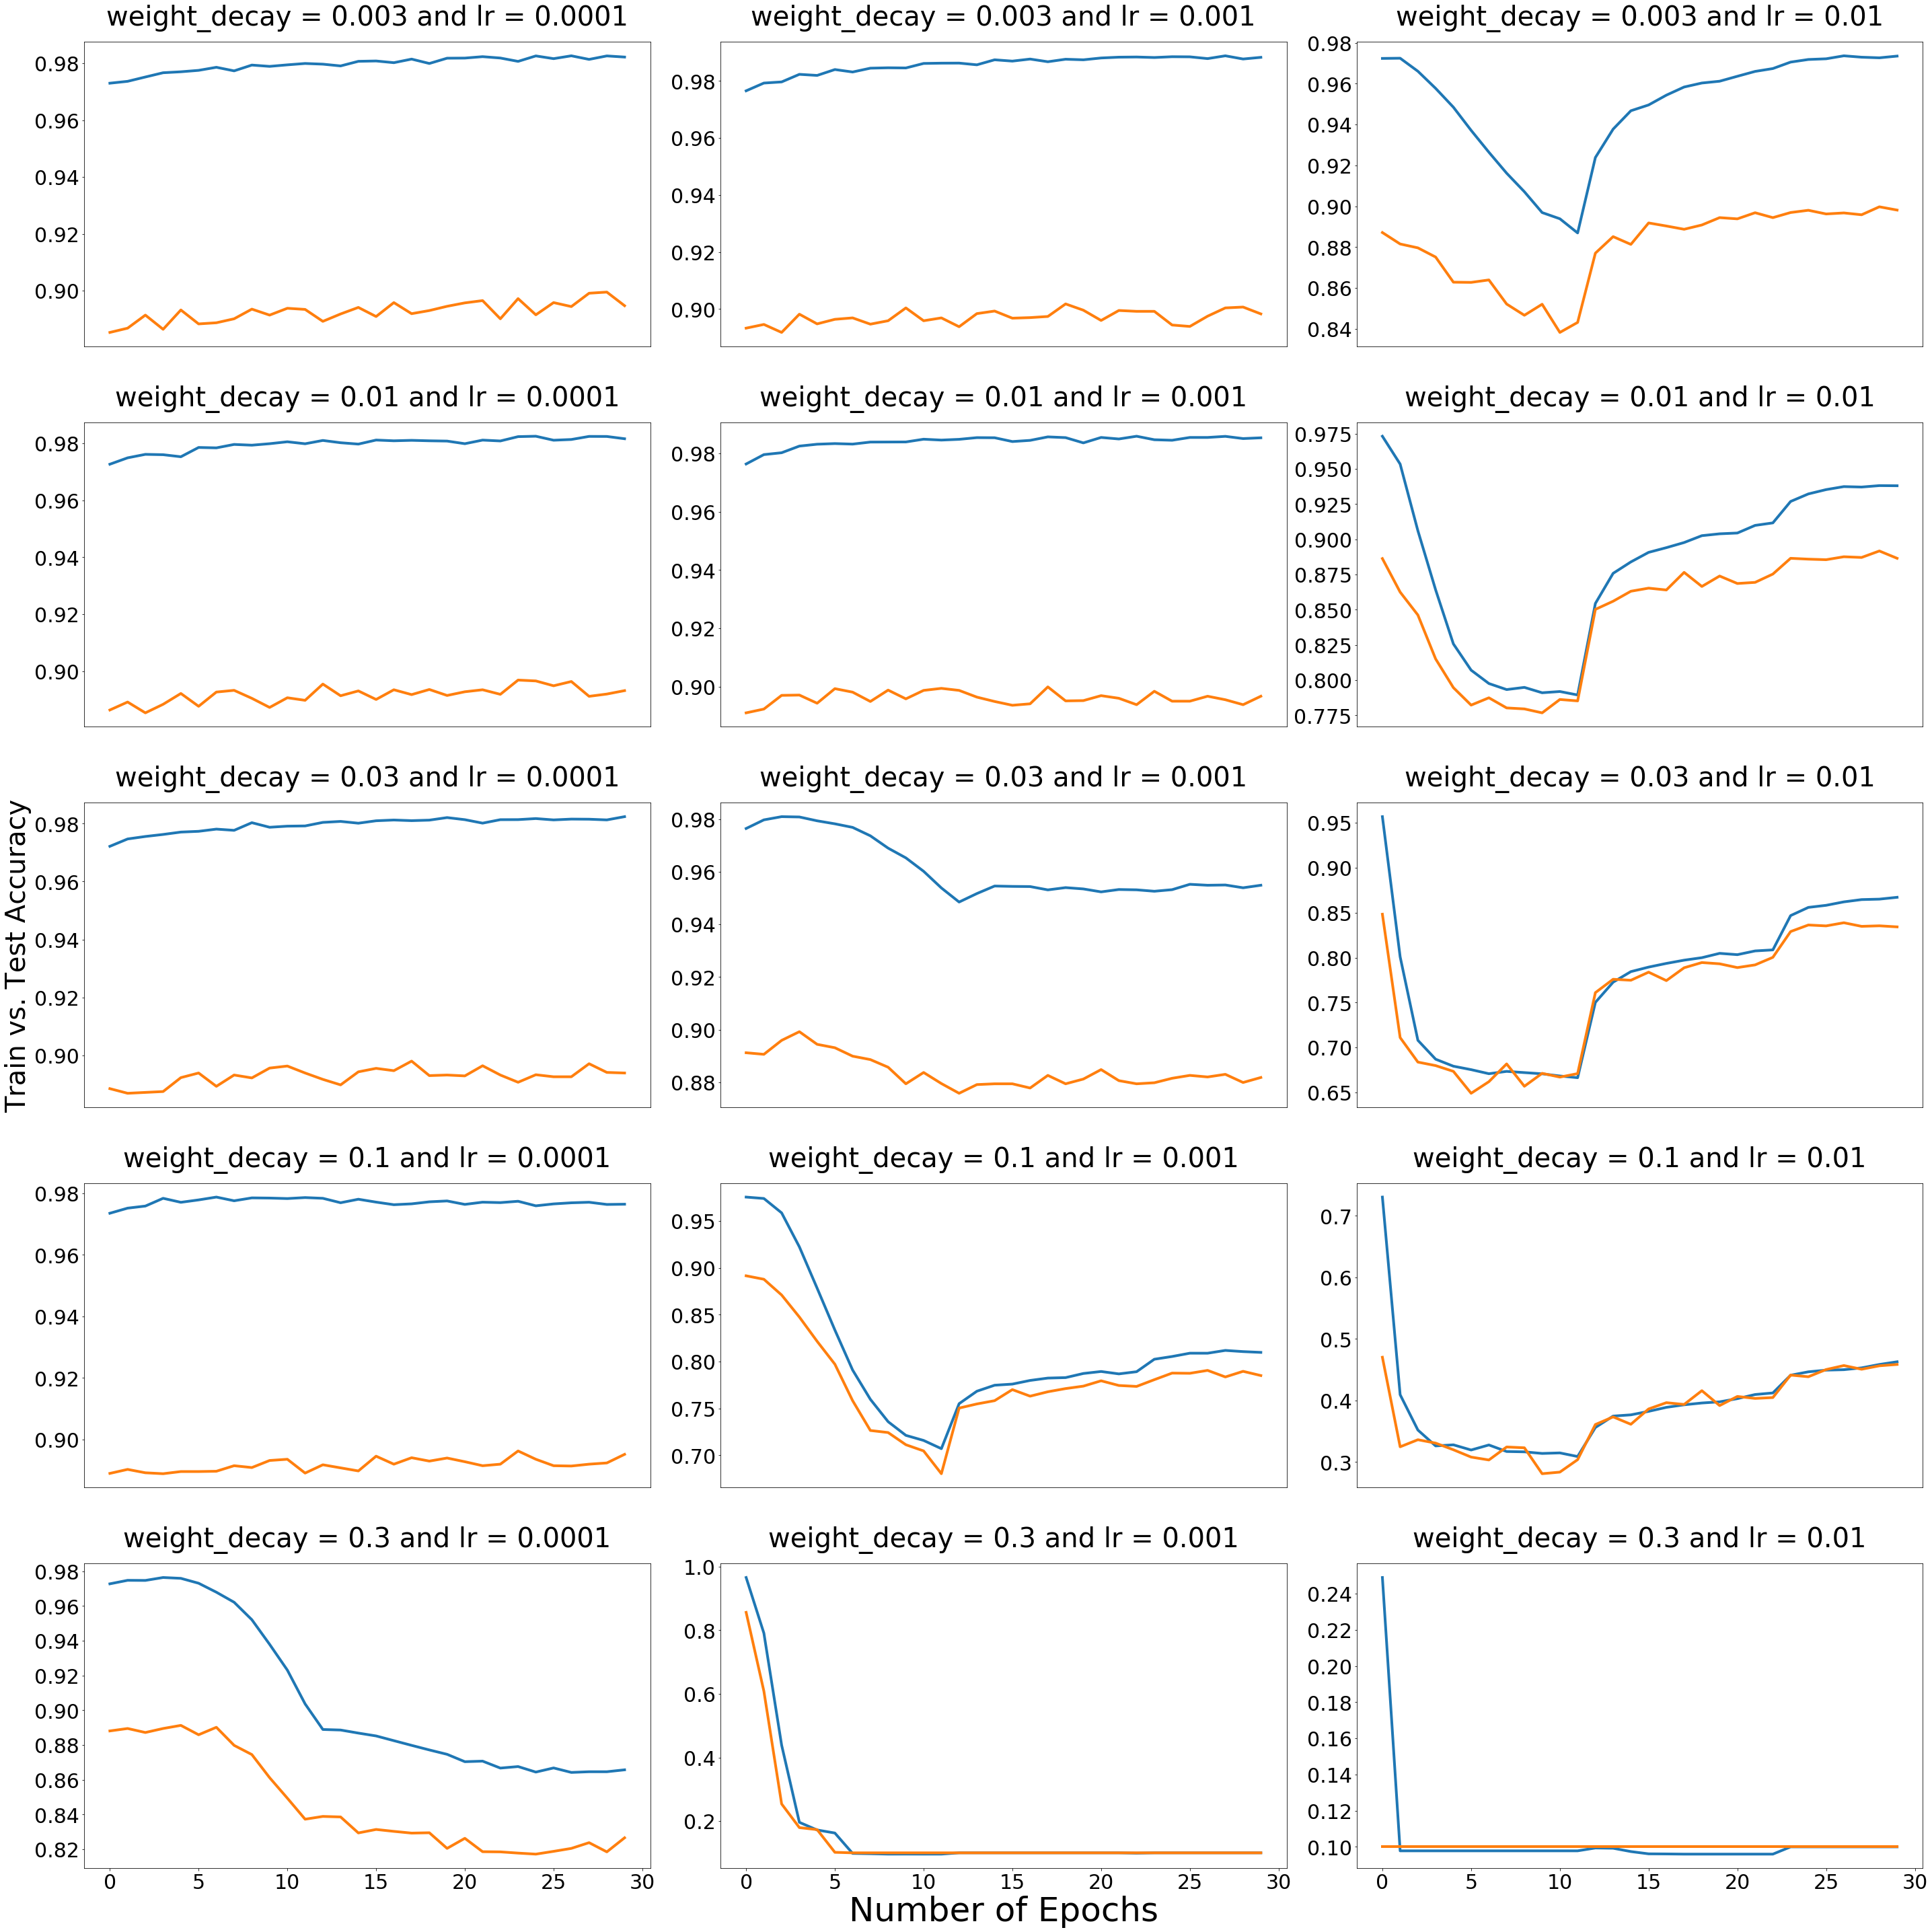

In [134]:
index = 1
fig = plt.figure(figsize = (40, 40))
for weight_decay in data.weight_decay.unique():
    for lr in data.lr.unique():
        
        plt.subplot(5, 3, index)
        plt.subplots_adjust(bottom = 0.2)
        plt.plot(range(30), data[(data.weight_decay == weight_decay) & (data.lr == lr)]['train_accuracy'], label='train', linewidth = 4)
        plt.plot(range(30), data[(data.weight_decay == weight_decay) & (data.lr == lr)]['test_accuracy'], label='test', linewidth = 4)
            
        if index == 7: plt.ylabel('Train vs. Test Accuracy', size = 40)
        if index == 14: plt.xlabel('Number of Epochs', size = 50)
        plt.title('weight_decay = {} and lr = {}'.format(weight_decay, lr), size = 40, pad=25)
#         plt.legend()
        plt.xticks([])
        if index in [13, 14, 15]: plt.xticks(range(0, 31, 5), size = 30)
        plt.yticks(size = 30)
        fig.tight_layout()
        index += 1
plt.show()

fig.savefig('train_vs_test.png'.format(weight_decay), bbox_inches = 'tight')

### Loss visualization for each combination

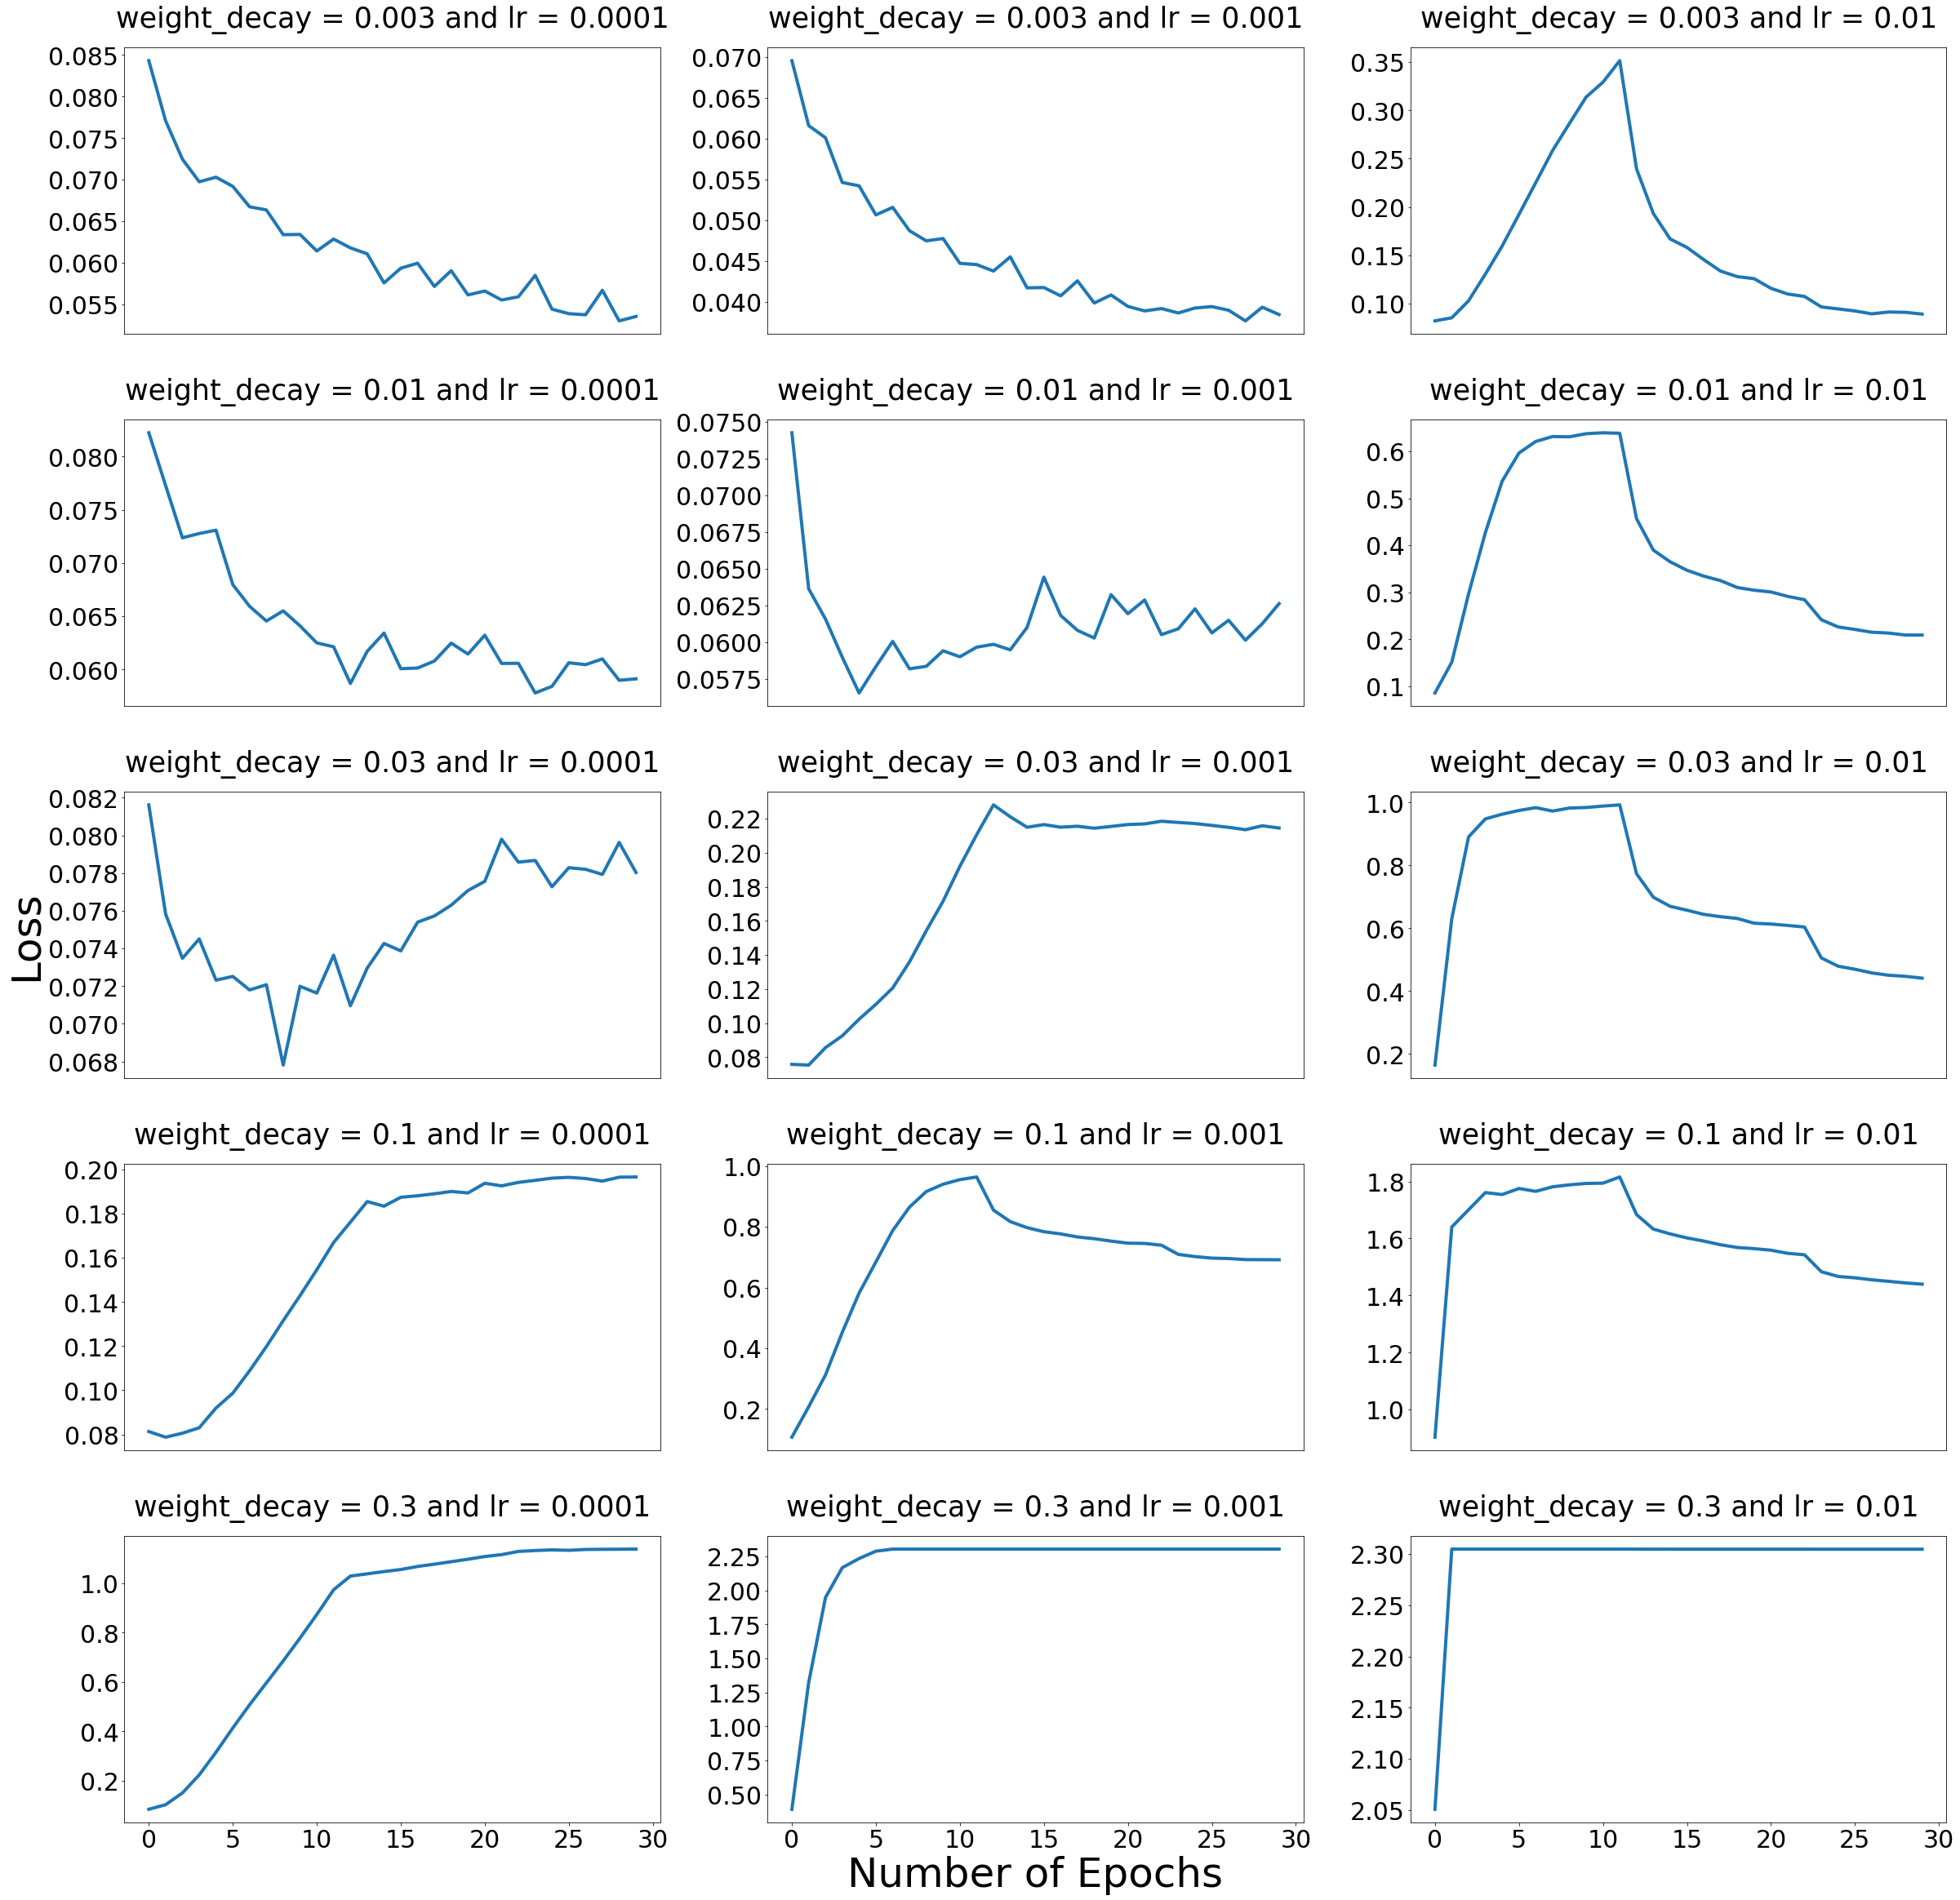

In [143]:
index = 1
fig = plt.figure(figsize = (40, 40))
for weight_decay in data.weight_decay.unique():
    for lr in data.lr.unique():
        
        plt.subplot(5, 3, index)
        plt.subplots_adjust(hspace = 0.3)
        plt.plot(range(30), data[(data.weight_decay == weight_decay) & (data.lr == lr)]['loss'], label='train', linewidth = 4)
            
        if index == 7: plt.ylabel('Loss', size = 50)
        if index == 14: plt.xlabel('Number of Epochs', size = 50)
        plt.title('weight_decay = {} and lr = {}'.format(weight_decay, lr), size = 35, pad=25)
#         plt.legend()
        plt.xticks([])
        if index in [13, 14, 15]: plt.xticks(range(0, 31, 5), size = 30)
        plt.yticks(size = 30)
#         fig.tight_layout()
        index += 1
plt.show()

fig.savefig('loss.png'.format(weight_decay), bbox_inches = 'tight')